# EPIC 220208795 -- Hard and Soft-edged disk

In this notebook we take the output of the testrun_disk notebook to model two other models. We do this using the <strong>pyPplusS</strong> package designed by Rein & Odir 2019. We make a new opaque model and a model where we add a partially transmitting edge to the opaque model.

In [1]:
import emcee
import logging
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
from Code import mcmc, eclipse

%matplotlib inline

## Load the Data

In [2]:
time, flux, error = np.loadtxt('data 2202/eclipse_lightcurve2202.txt', skiprows=1).T

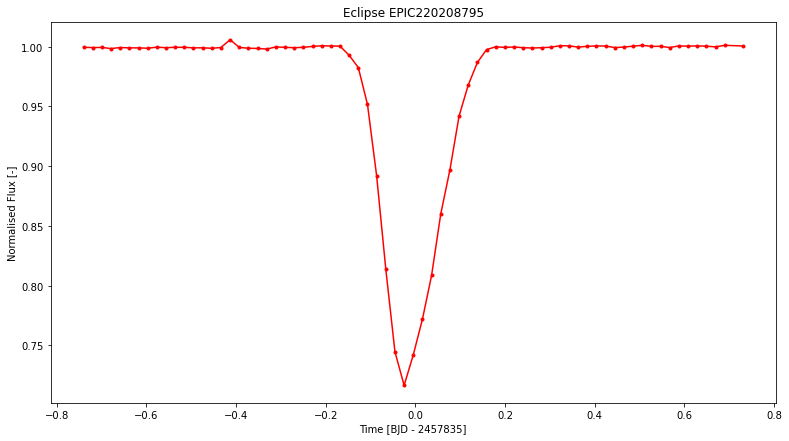

In [3]:
plt.figure(figsize=(13, 7))
plt.title('Eclipse EPIC220208795')
plt.xlabel('Time [BJD - 2457835]')
plt.ylabel('Normalised Flux [-]')
plt.errorbar(time, flux, yerr=error, fmt='.', color='r', ls='-')
plt.show()

## Model Set-up

This takes the <strong>disk_model()</strong> function from <strong>eclipse_functions</strong>, and creates sub-functions for the fuzzy disk model.

In [4]:
# model functions
edged_disk       = eclipse.disk_model
edged_prior       = eclipse.disk_prior

In [5]:
# Bounds of the parameters (t = tilt, T = tau, rest as above)
rl, ru = (0., 10.)
bl, bu = (-10.,10.)
il, iu = (0., np.pi/2.)
tl, tu = (0., np.pi/2.)
vl, vu = (4.3, 15) # 220208795
xl, xu = (-10.,10.)
Tl, Tu = (0.,1.)

# Manual Checking small disk

Here we use the testrun disk (high inclination) solution to manually test a better fit with a smaller disk

In [26]:
# best fit parameters from the testrun:
# r = 1.316756
# ip = 0.949811
# incl = 1.259187
# tilt = 0.847969
# v = 9.950450
# ts = -0.042518

# model functions
pack_osd = lambda rd, b, inc, tilt, vel, dx: (rd, 0., b, inc, tilt, vel, dx, 1., 0.)
opaque_small_disk      = lambda P, time: eclipse.disk_model(pack_osd(*P), time)
opaque_small_prior      = lambda P: eclipse.disk_prior(pack_osd(*P))

# setting up labels, units and bounds for the opaque_small disk
lbls_osd = ['disk radius', 'impact parameter', 'inclination', 'tilt', 'velocity',
           'time shift']
units_osd = ['R*', 'R*', 'deg', 'deg', 'R*/day', 'day']
bounds_osd = [(rl, ru/2.), (bl/2., bu/2.), (iu/2., iu), (tl, tu),  (vl,vu/2.),
             (-0.5, 0.5),]

C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:252: RuntimeWarning: invalid value encountered in true_divide
  x = a*(1-t**2)/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:253: RuntimeWarning: invalid value encountered in true_divide
  y = b*2*t/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\segment_models.py:452: RuntimeWarning: invalid value encountered in less
  todo_start = np.all(np.logical_or(splitr[:,2:]<rcrit,np.isnan(splitr[:,2:])),-1)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:252: RuntimeWarning: invalid value encountered in true_divide
  x = a*(1-t**2)/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:253: RuntimeWarning: invalid value encountered in true_divide
  y = b*2*t/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\segment_models.py:452: RuntimeWarning: invalid value

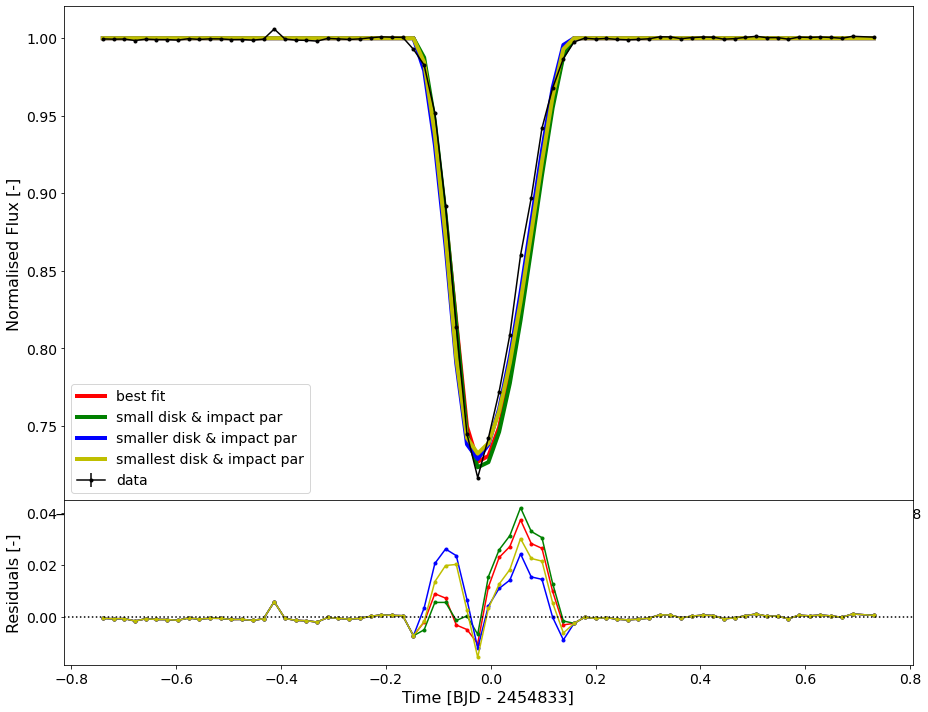

array([476123.94567123, 606166.62530365, 342552.56096733, 378915.2455759 ])

In [9]:
#creating models with smaller disks

P_osd1 = (1.32,0.95,1.26,0.85,9.95,-0.04) #best fit
P_osd2 = (1.2,0.8,1.26,0.85,10,-0.03)
P_osd3 = (1.1,0.69,1.26,0.85,10,-0.03)
P_osd4 = (1,0.55,1.26,0.85,10,-0.02)
P_osd_list = [P_osd1,P_osd2,P_osd3,P_osd4]
model_osd_list = [opaque_small_disk, opaque_small_disk, opaque_small_disk, opaque_small_disk]
lbls_osd = ['best fit', 'small disk & impact par','smaller disk & impact par', 'smallest disk & impact par']

#plotting
mcmc.plot_models(time, flux, error, model_osd_list, P_osd_list, lbls=lbls_osd)

C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:252: RuntimeWarning: invalid value encountered in true_divide
  x = a*(1-t**2)/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:253: RuntimeWarning: invalid value encountered in true_divide
  y = b*2*t/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\segment_models.py:452: RuntimeWarning: invalid value encountered in less
  todo_start = np.all(np.logical_or(splitr[:,2:]<rcrit,np.isnan(splitr[:,2:])),-1)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:252: RuntimeWarning: invalid value encountered in true_divide
  x = a*(1-t**2)/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\base_functions.py:253: RuntimeWarning: invalid value encountered in true_divide
  y = b*2*t/(1+t**2)
C:\Users\lvand\Downloads\Notebooks\BRP\v928tau-master\pyPplusS\segment_models.py:452: RuntimeWarning: invalid value

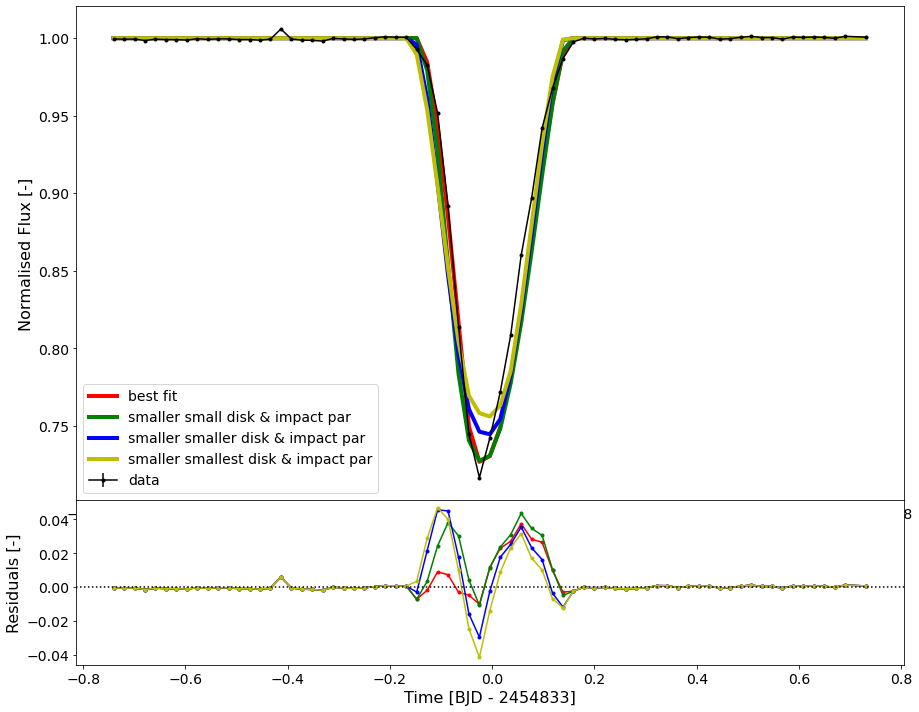

array([476123.94567123, 897932.26358151, 920261.77370758, 947957.49635467])

In [16]:
#doing more tests
P_osd21 = (1.32,0.95,1.26,0.85,9.95,-0.04) #best fit
P_osd22 = (0.9,0.3,1.26,0.85,10,-0.01)
P_osd23 = (0.8,0.1,1.23,0.82,10,-0.01)
P_osd24 = (0.7,0.0,1.15,0.7,10,-0.01)
P_osd2_list = [P_osd21,P_osd22,P_osd23,P_osd24]
model_osd2_list = [opaque_small_disk, opaque_small_disk, opaque_small_disk, opaque_small_disk]
lbls_osd2 = ['best fit', 'smaller small disk & impact par','smaller smaller disk & impact par', 'smaller smallest disk & impact par']

#plotting
mcmc.plot_models(time, flux, error, model_osd2_list, P_osd2_list, lbls=lbls_osd2)

# Smaller disk MCMC

Here we take the smallest possible disk size from the models manually created above, in this case the one with a disk size of 0.9, to run a new MCMC

In [12]:
# Take the priors from the smallest nice looking disk  (0.9,0.3,1.26,0.85,10,-0.01)

#creating a Gaussian prior
rp0_osd = np.random.normal(0.9, 0.1, 1000)
ip0_osd = np.random.normal(0.3, 0.1, 1000)
incl0_osd = np.random.normal(1.259187, 0.1, 1000)
tilt0_osd = np.random.normal(0.847969, 0.1, 1000)
vel0_osd = np.random.normal(9.950450, 0.5, 1000)
ts0_osd = np.random.normal(-0.042518, 0.1, 1000)
p0_osd = np.array([rp0_osd,ip0_osd,incl0_osd,tilt0_osd,vel0_osd,ts0_osd])
p0_osd = p0_osd.T

In [13]:
# mcmc parameters for the opaque_small disk
be_osd = 'models 2202/opaque_small_disk_2202.h5'
mcmc_args_osd = (time, flux, error, opaque_small_disk, opaque_small_prior)
BE_osd = emcee.backends.HDFBackend(be_osd)

# run mcmc for the opaque_small disk
#p_osd, sampler_osd = mcmc.run_mcmc(*mcmc_args_osd, p0_osd, 1000, reset=False, savename=be_osd)

# load mcmc for the opaque_small disk
sampler_osd = emcee.EnsembleSampler(1000, 6, mcmc.lnprob, args=mcmc_args_osd, backend=BE_osd)

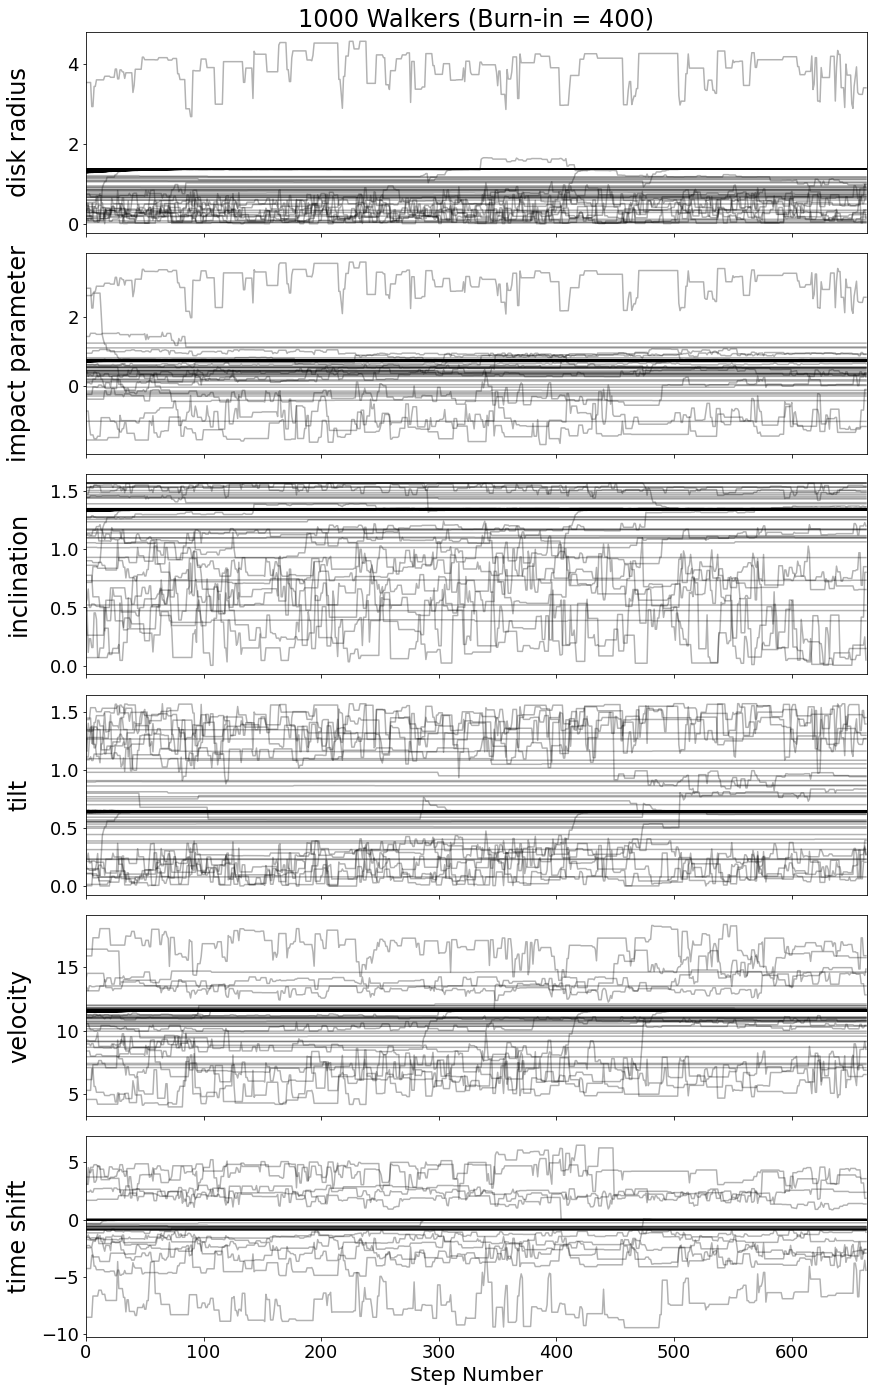

In [15]:
mcmc.plot_walkers(sampler_osd, 400, lbls_osd)

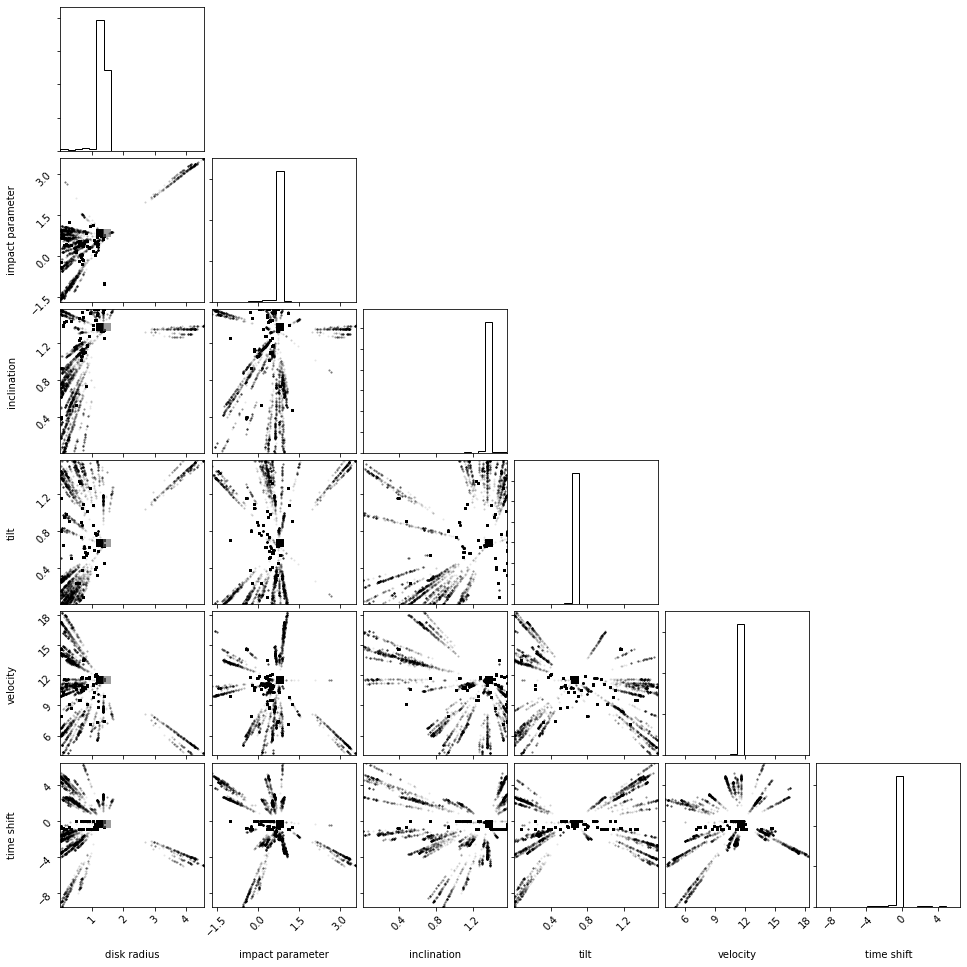

In [14]:
mcmc.plot_triangle(sampler_osd, 400, lbls_osd)

This looks like one clear solution, so no need to separate solutions.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


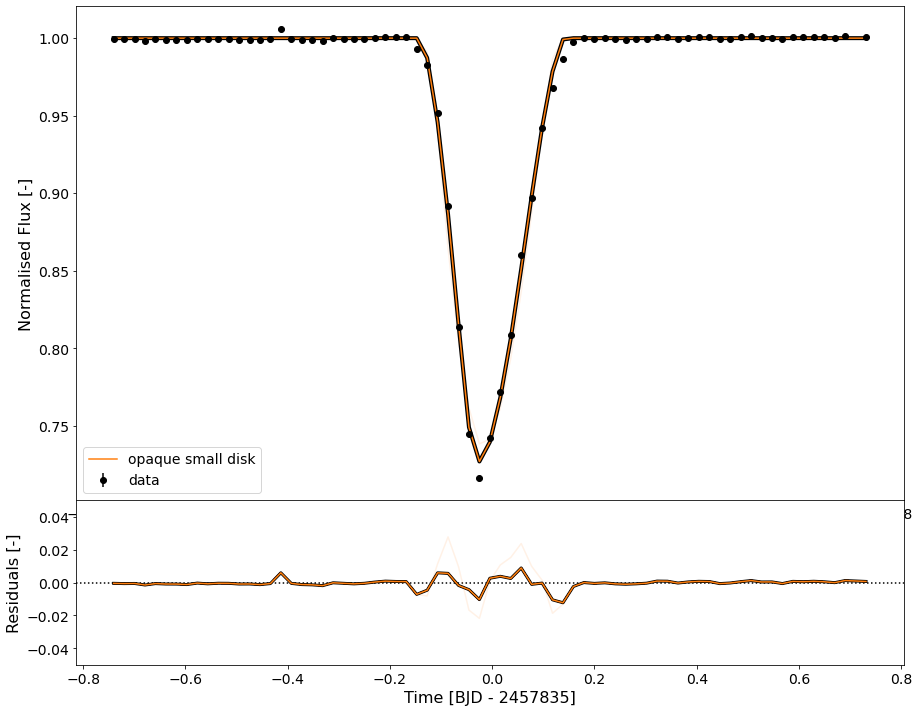

In [17]:
# determine burn-in for the opaque 'small' disk
cut_osd = 500

# carry out statistics for the solutions for the opaque 'small' disk
stats_osd, pb_osd = mcmc.stats(sampler_osd, cut=cut_osd)

# plot the samples for the solutions for the opaque 'small' disk
_ = mcmc.plot_samples(time, flux, error, [opaque_small_disk], [sampler_osd], ['hard edged disk'], cut_osd, 100, 
                 best_fit=True, dt=3002, residual_lims=(-0.015,0.015))

In [26]:
#extracting the best fit parameters

mcmc.print_parameters(pb_osd, lbls_osd, units_osd)

disk radius        =     +1.374232     [R*]
impact parameter   =     +0.739670     [R*]
inclination        =     +77.01375     [deg]
tilt               =     +36.80969     [deg]
velocity           =     +11.58859     [R*/day]
time shift         =     -0.040829     [day]


In [40]:
# saving the best fit model
np.save('models 2202/small_disk_run_2202.npy', pb_osd)

# Soft-edged model

Here we add a soft edge around the model, based on the residuals of about 1 percent above. Adding a soft edge might widen the wings of the eclipse and deepen the eclipse and resolve the residuals.

In [19]:
# model functions
pack_osf = lambda rd, re, b, inc, tilt, vel, dx, te: (rd, re, b, inc, tilt, vel, dx, 1., te)
fuzzy_small_disk      = lambda P, time: eclipse.disk_model(pack_osf(*P), time)
fuzzy_small_prior      = lambda P: eclipse.disk_prior(pack_osf(*P))

# setting up labels, units and bounds for the fuzzy_small disk
lbls_osf = ['disk radius', 'edge thickness', 'impact parameter', 'inclination', 'tilt', 
           'velocity', 'time shift', 'edge opacity']
units_osf = ['R*', 'R*', 'R*', 'deg', 'deg', 'R*/day', 'day', '-']
bounds_osf = [(rl, ru/2.), (rl, ru/2.), (bl/2., bu/2.), (iu/2., iu), (tl, tu), (vl, vu/2.), 
             (-0.5, 0.5), (Tl, Tu/2.)]

## Testing the optimal radius and opacity of the soft edge based on previous best fit parameters

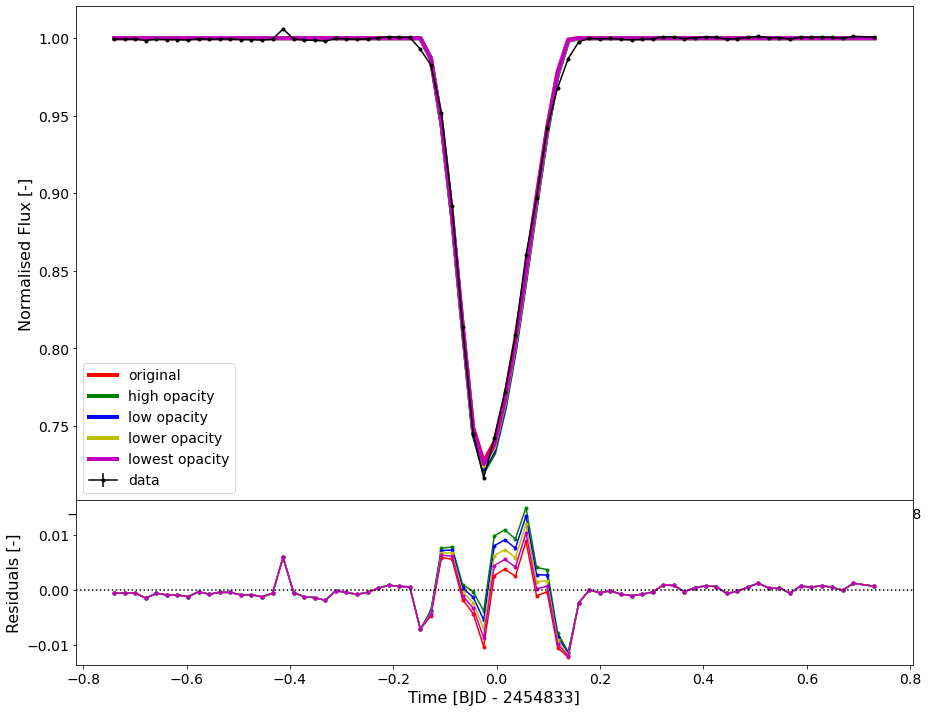

array([ 70729.18098595, 101283.26265603,  87807.32327763,  78222.99653982,
        72530.28244259])

In [31]:
#creating models with a soft edge around it
P_original = (1.37423211,0,0.739670,1.34414347,0.642450360,11.58859,-0.040829,0)
P_osf1 = (1.37423211,0.1,0.739670,1.34414347,0.642450360,11.58859,-0.040829,0.2)
P_osf2 = (1.37423211,0.1,0.739670,1.34414347,0.642450360,11.58859,-0.040829,0.15)
P_osf3 = (1.37423211,0.1,0.739670,1.34414347,0.642450360,11.58859,-0.040829,0.1)
P_osf4 = (1.37423211,0.1,0.739670,1.34414347,0.642450360,11.58859,-0.040829,0.05)
P_osf_list = [P_original, P_osf1, P_osf2, P_osf3, P_osf4]
model_osf_list = [fuzzy_small_disk]*5
lbls_osf = ['original','high opacity', 'low opacity', 'lower opacity', 'lowest opacity']
mcmc.plot_models(time, flux, error, model_osf_list, P_osf_list, lbls=lbls_osf)

It just looks like the residuals move up and down, so we pick a radius of 0.1 R* and an opacity of 0.1 to start with

In [7]:
#creating Gaussian priors based on previous best fit
rd0_osf = np.random.normal(1.37423211, 0.1, 1000)
re0_osf = np.random.normal(0.1, 0.1, 1000)
ip0_osf = np.random.normal(0.739670, 0.1, 1000)
incl0_osf = np.random.normal(1.34414347, 0.1, 1000)
tilt0_osf = np.random.normal(0.642450360, 0.1, 1000)
vel0_osf = np.random.normal(11.58859, 0.1, 1000)
ts0_osf = np.random.normal(-0.040829, 0.01, 1000)
te0_osf = np.random.normal(0.1, 0.1, 1000)
p0_osf = np.array([rd0_osf,re0_osf,ip0_osf,incl0_osf,tilt0_osf,vel0_osf,ts0_osf,te0_osf])
p0_osf = p0_osf.T

In [8]:
# mcmc parameters for the best fit disk with fuzzy edge
be_osf = 'modelsL/fuzzy_small_disk_2202.h5'
mcmc_args_osf = (time, flux, error, fuzzy_small_disk, fuzzy_small_prior)
BE_osf = emcee.backends.HDFBackend(be_osf)

# run mcmc for the fuzzy_small disk
#p_osf, sampler_osf = mcmc.run_mcmc(*mcmc_args_osf, p0_osf, 1000, reset=False, savename=be_osf)

# load mcmc for the fuzzy_small disk
sampler_osf = emcee.EnsembleSampler(1000, 8, mcmc.lnprob, args=mcmc_args_osf, backend=BE_osf)

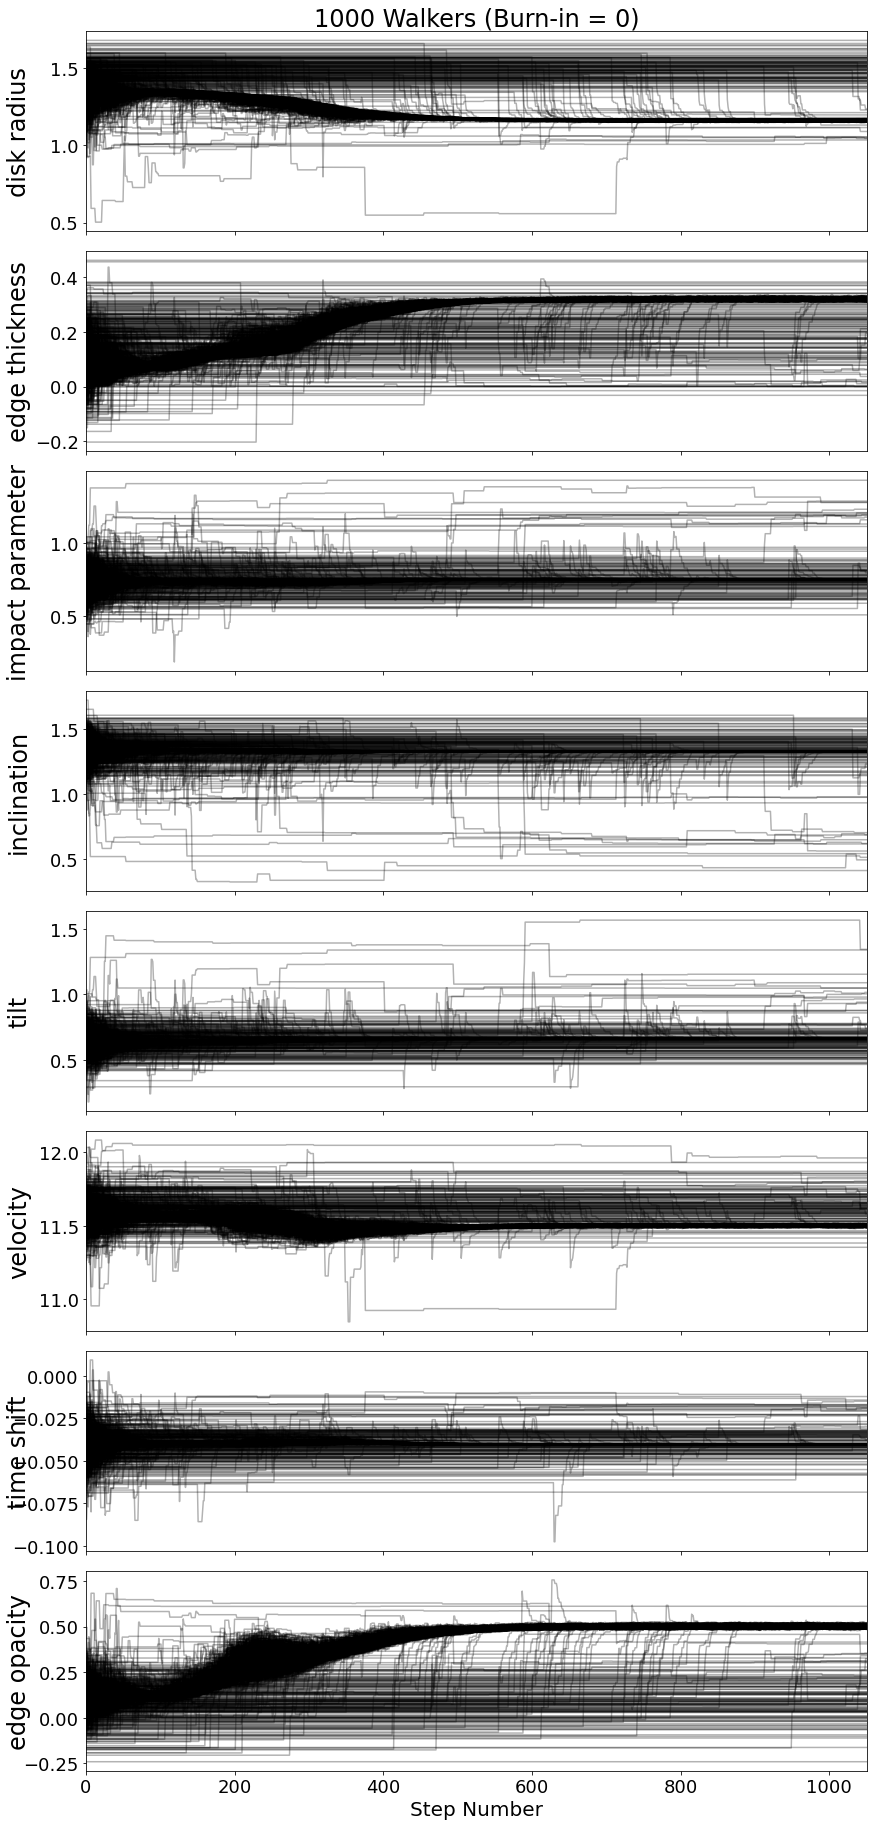

In [13]:
mcmc.plot_walkers(sampler_osf, 0, lbls_osf)

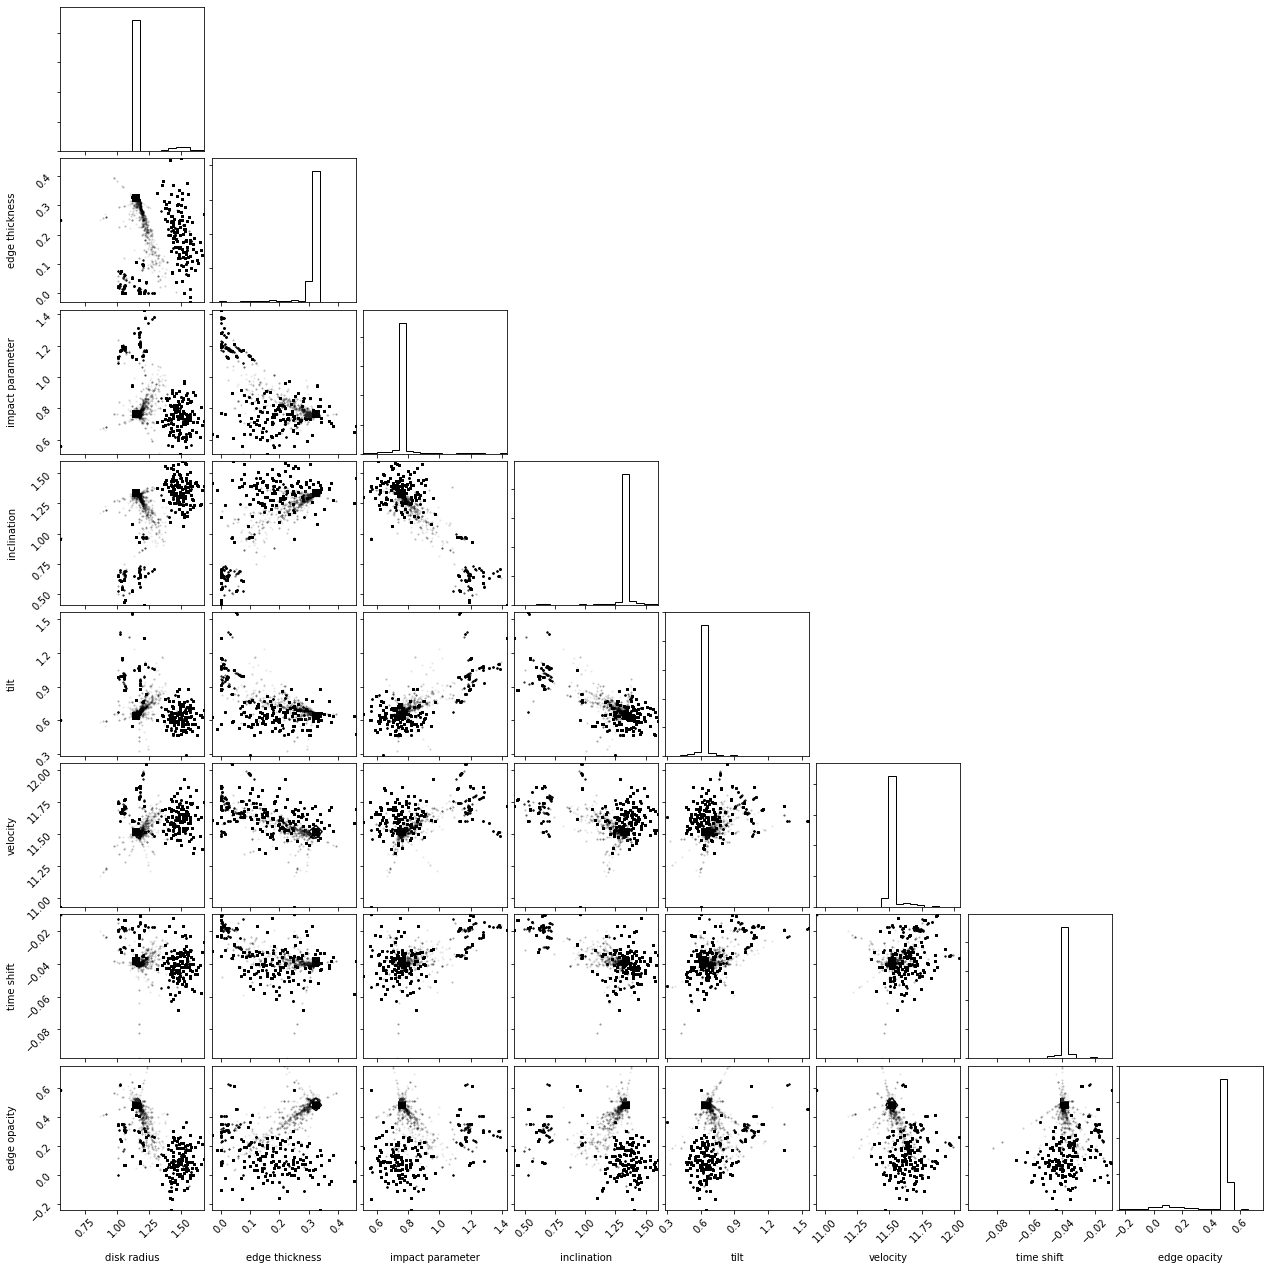

In [15]:
mcmc.plot_triangle(sampler_osf, 550, lbls_osf)

Again looks like one clear solution.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


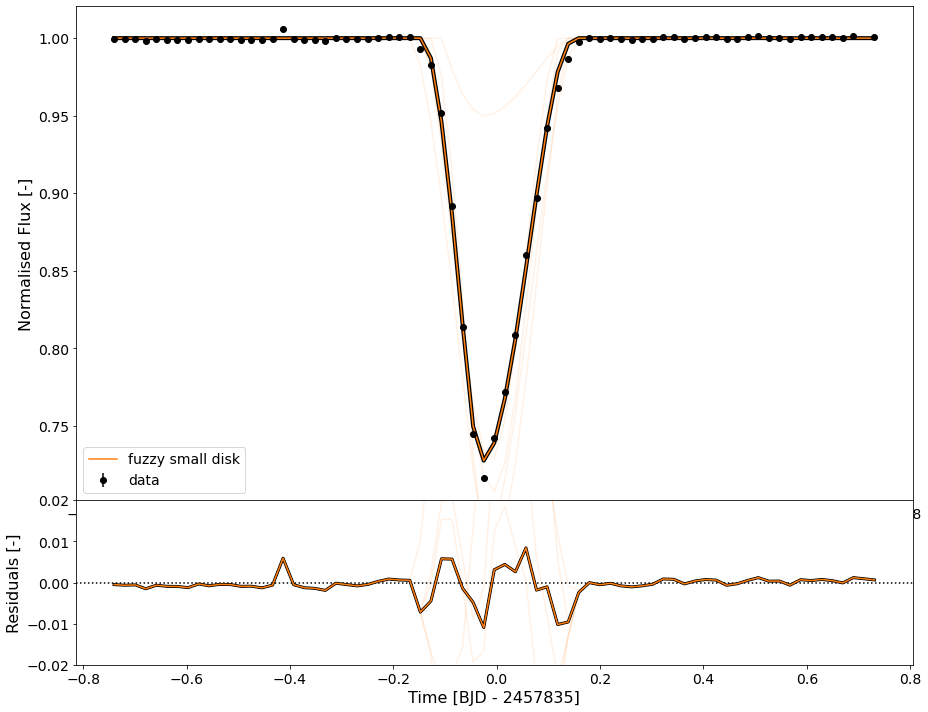

In [21]:
# determine burn-in for the fuzzy disk
cut_osf = 550

# carry out statistics for solutions for the fuzzy disk
stats_osf, pb_osf = mcmc.stats(sampler_osf, cut=cut_osf)

# plot the samples for the fuzzy disk
_ = mcmc.plot_samples(time, flux, error, [fuzzy_small_disk], [sampler_osf], ['soft edged disk'], cut_osf, 100, 
                 best_fit=True, dt=3002, residual_lims=(-0.02,0.02))

In [18]:
#extracting best fit parameters
mcmc.print_parameters(pb_osf, lbls_osf, units_osf)

disk radius        =     +1.163149     [R*]
edge thickness     =     +0.316950     [R*]
impact parameter   =     +0.753684     [R*]
inclination        =     +75.94356     [deg]
tilt               =     +38.03684     [deg]
velocity           =     +11.50082     [R*/day]
time shift         =     -0.040396     [day]
edge opacity       =     +0.498731     [-]


In [23]:
# saving the best fit model
np.save('models 2202/fuzzy_small_disk_run_2202.npy', pb_osf)

In [33]:
print(chi2)

[70729.20587178 65954.61222587]
